#  Co2 Emission By Vehicles

## Importing all necessary libraries

In [102]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import scatter_matrix
import warnings
warnings.filterwarnings("ignore")
from sklearn.svm import SVR
from plotly.subplots import make_subplots
import xgboost as xgb
from sklearn.ensemble import RandomForestRegressor
import math
from sklearn.preprocessing import LabelEncoder
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import plotly.graph_objects as go
import plotly.express as px
from itertools import cycle

In [103]:
file_path = "CO2 Emissions_Canada.csv"
df = pd.read_csv(file_path)
df.head()

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [104]:
print(df.head())
print(df.info())
print(df.duplicated().sum())
df = df.drop_duplicates()

    Make       Model Vehicle Class  Engine Size(L)  Cylinders Transmission  \
0  ACURA         ILX       COMPACT             2.0          4          AS5   
1  ACURA         ILX       COMPACT             2.4          4           M6   
2  ACURA  ILX HYBRID       COMPACT             1.5          4          AV7   
3  ACURA     MDX 4WD   SUV - SMALL             3.5          6          AS6   
4  ACURA     RDX AWD   SUV - SMALL             3.5          6          AS6   

  Fuel Type  Fuel Consumption City (L/100 km)  \
0         Z                               9.9   
1         Z                              11.2   
2         Z                               6.0   
3         Z                              12.7   
4         Z                              12.1   

   Fuel Consumption Hwy (L/100 km)  Fuel Consumption Comb (L/100 km)  \
0                              6.7                               8.5   
1                              7.7                               9.6   
2                   

In [105]:
df.shape

(6282, 12)

In [106]:
df.isnull().sum()

Make                                0
Model                               0
Vehicle Class                       0
Engine Size(L)                      0
Cylinders                           0
Transmission                        0
Fuel Type                           0
Fuel Consumption City (L/100 km)    0
Fuel Consumption Hwy (L/100 km)     0
Fuel Consumption Comb (L/100 km)    0
Fuel Consumption Comb (mpg)         0
CO2 Emissions(g/km)                 0
dtype: int64

In [107]:
df= df.drop_duplicates()
df.shape

(6282, 12)

       Engine Size(L)    Cylinders  Fuel Consumption City (L/100 km)  \
count     6282.000000  6282.000000                       6282.000000   
mean         3.161812     5.618911                         12.610220   
std          1.365201     1.846250                          3.553066   
min          0.900000     3.000000                          4.200000   
25%          2.000000     4.000000                         10.100000   
50%          3.000000     6.000000                         12.100000   
75%          3.700000     6.000000                         14.700000   
max          8.400000    16.000000                         30.600000   

       Fuel Consumption Hwy (L/100 km)  Fuel Consumption Comb (L/100 km)  \
count                      6282.000000                       6282.000000   
mean                          9.070583                         11.017876   
std                           2.278884                          2.946876   
min                           4.000000         

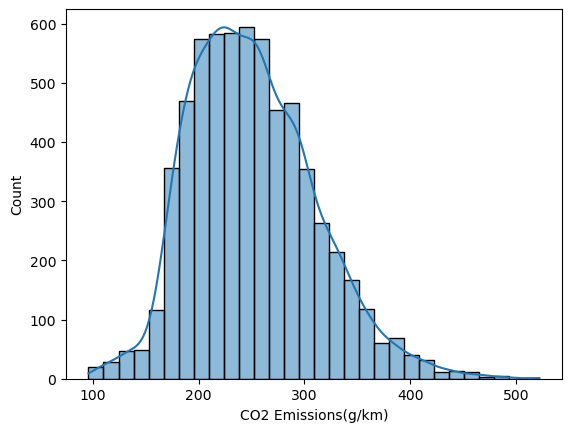

In [108]:
print(df.describe()) 
sns.histplot(df['CO2 Emissions(g/km)'], bins=30, kde=True)
plt.show()

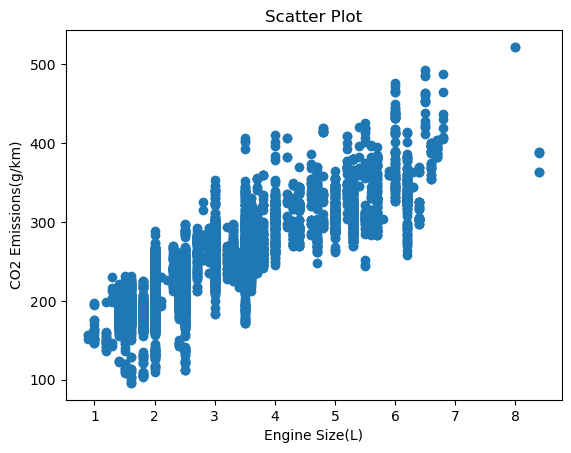

In [109]:
plt.scatter(df['Engine Size(L)'], df['CO2 Emissions(g/km)'])
plt.title('Scatter Plot')
plt.xlabel('Engine Size(L)')
plt.ylabel('CO2 Emissions(g/km)')
plt.show()



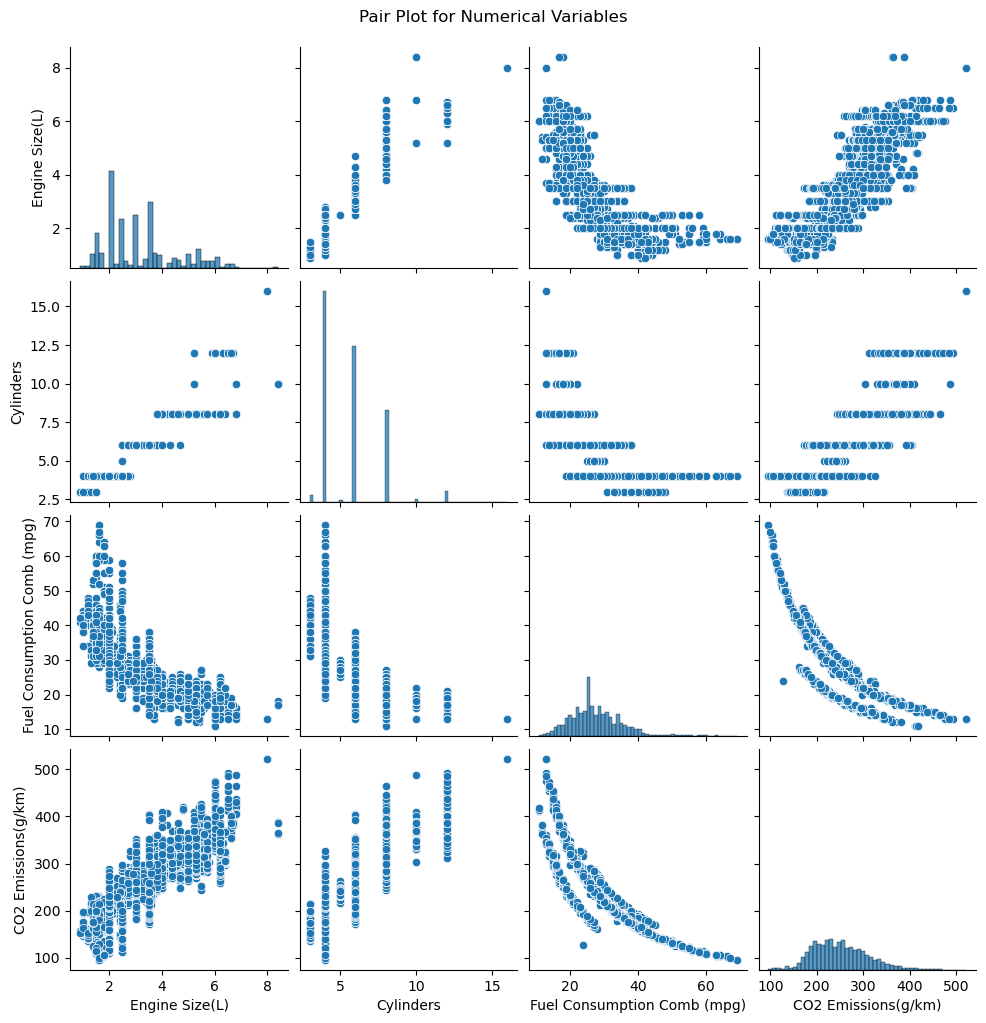

In [110]:
numerical_vars = ['Engine Size(L)', 'Cylinders', 'Fuel Consumption Comb (mpg)', 'CO2 Emissions(g/km)']

# Subset the DataFrame with numerical variables
numerical_df = df[numerical_vars]

# Create a pair plot using seaborn
sns.pairplot(numerical_df)
plt.suptitle('Pair Plot for Numerical Variables', y=1.02)
plt.show()


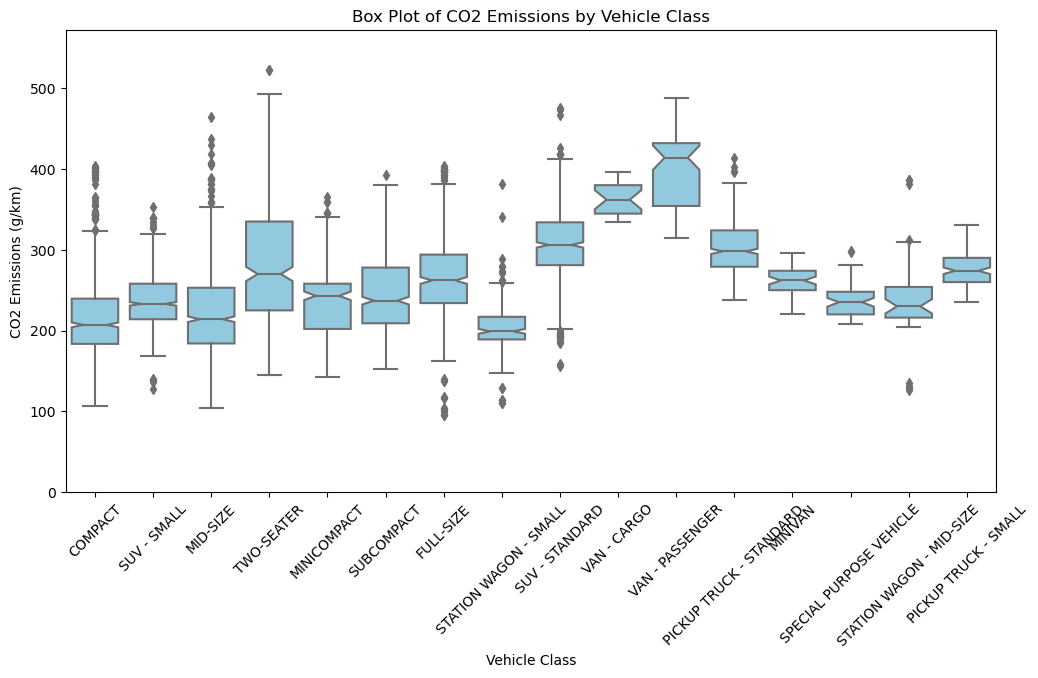

In [111]:
plt.figure(figsize=(12, 6))

# Customize the box plot using seaborn
sns.boxplot(x='Vehicle Class', y='CO2 Emissions(g/km)', data=df, color='skyblue', notch=True)

# Customize the plot further if needed
plt.title('Box Plot of CO2 Emissions by Vehicle Class')
plt.ylabel('CO2 Emissions (g/km)')
plt.xlabel('Vehicle Class')
plt.xticks(rotation=45)
plt.ylim(0, df['CO2 Emissions(g/km)'].max() + 50)  # Set y-axis range

# Show the plot
plt.show()


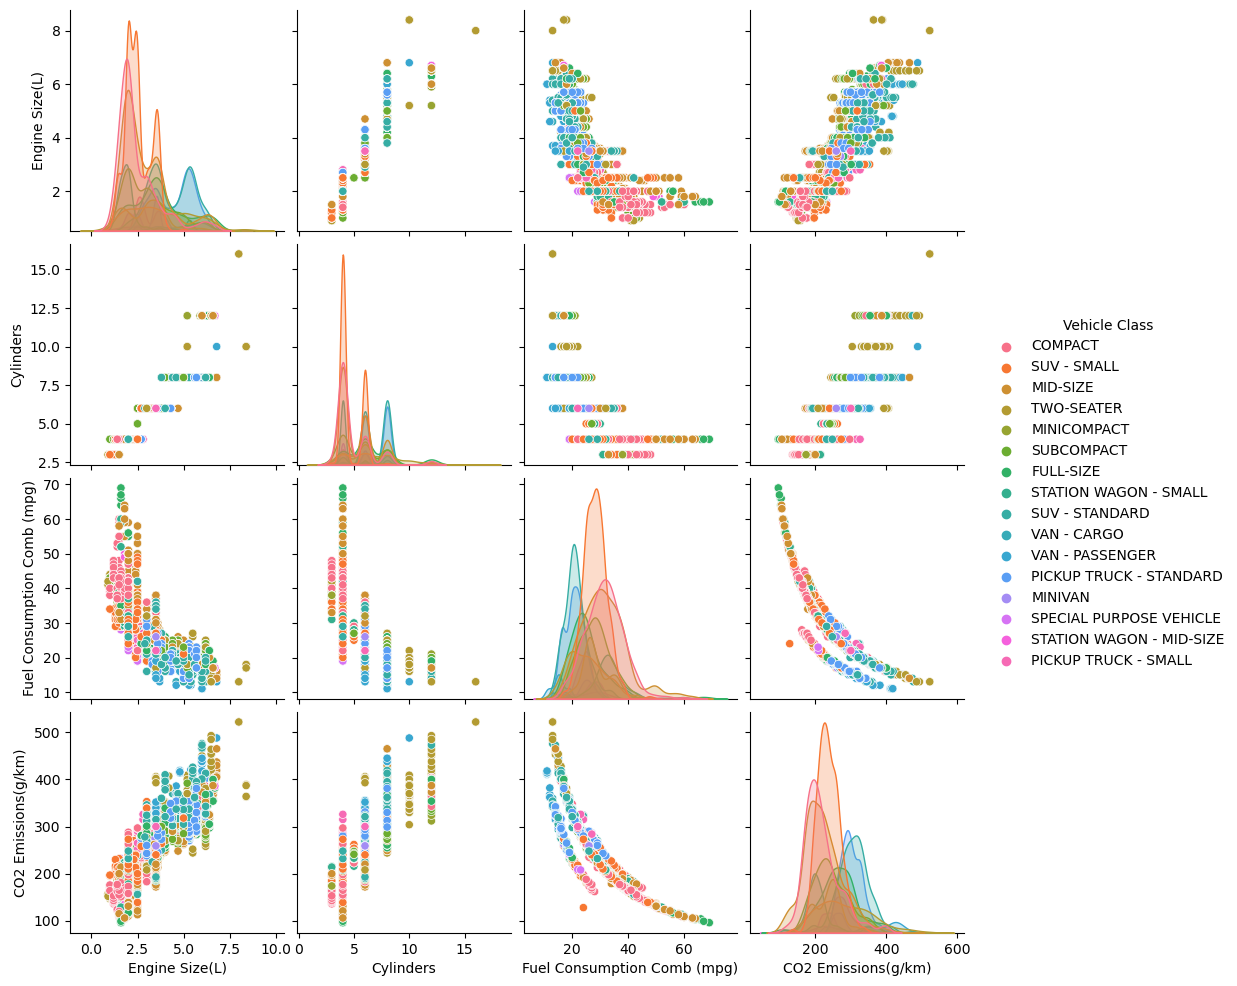

In [141]:
# Scatter plot matrix with hue for 'Vehicle Class'
sns.pairplot(df[['Engine Size(L)', 'Cylinders', 'Fuel Consumption Comb (mpg)', 'CO2 Emissions(g/km)', 'Vehicle Class']], hue='Vehicle Class')
plt.show()

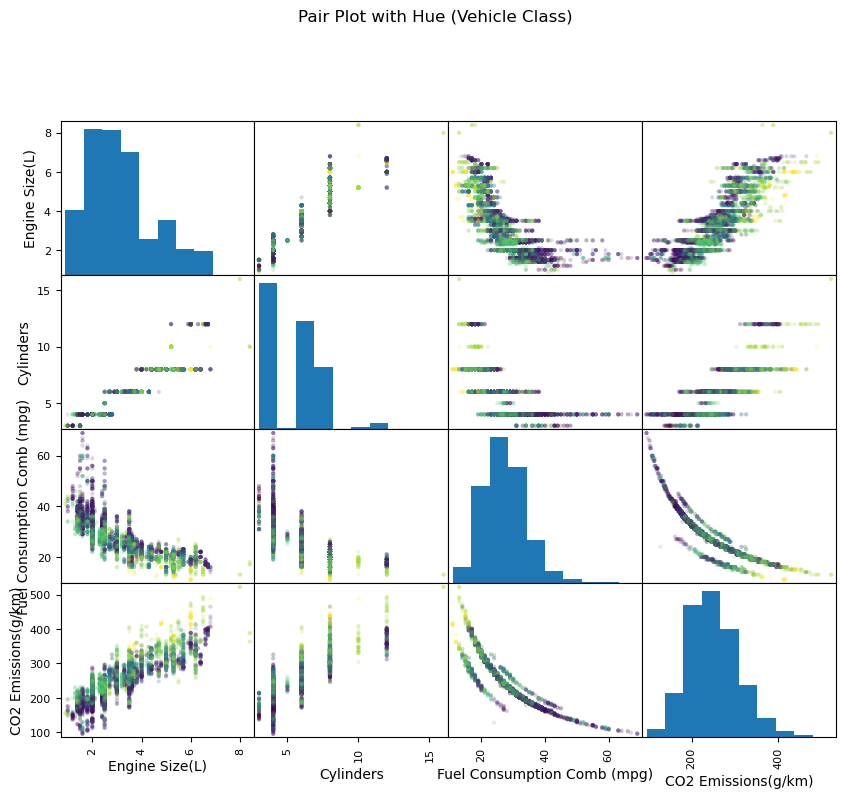

In [138]:
# Load your dataset
data = pd.read_csv('CO2 Emissions_Canada.csv')

# Select relevant columns
columns_to_plot = ['Engine Size(L)', 'Cylinders', 'Fuel Consumption Comb (mpg)', 'CO2 Emissions(g/km)']

# Generate pair plot
scatter_matrix(data[columns_to_plot], alpha=0.2, figsize=(10, 8), diagonal='hist', c=data['Vehicle Class'].astype('category').cat.codes)

# Add title
plt.suptitle("Pair Plot with Hue (Vehicle Class)", y=1.02)

# Show the plot
plt.show()


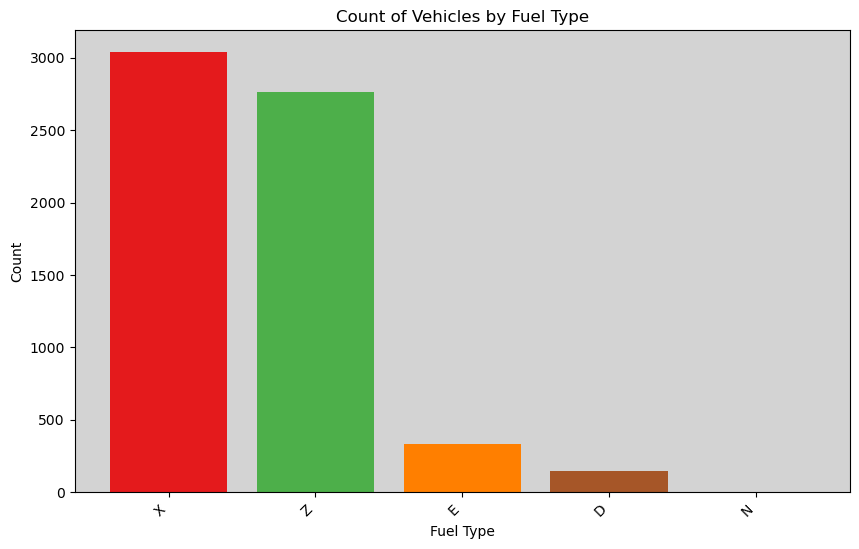

In [113]:

# Group the data by 'Fuel Type' and calculate the count
fuel_type_counts = df['Fuel Type'].value_counts()

# Create a color scale for different fuel types
color_scale = plt.cm.get_cmap('Set1', len(df['Fuel Type'].unique()))

# Plot the bar chart
fig, ax = plt.subplots(figsize=(10, 6))
bars = ax.bar(fuel_type_counts.index, fuel_type_counts.values, color=color_scale(np.arange(len(fuel_type_counts))))

# Set title and labels
ax.set_title('Count of Vehicles by Fuel Type')
ax.set_xlabel('Fuel Type')
ax.set_ylabel('Count')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Set background color
ax.set_facecolor('lightgray')

# Show the plot
plt.show()


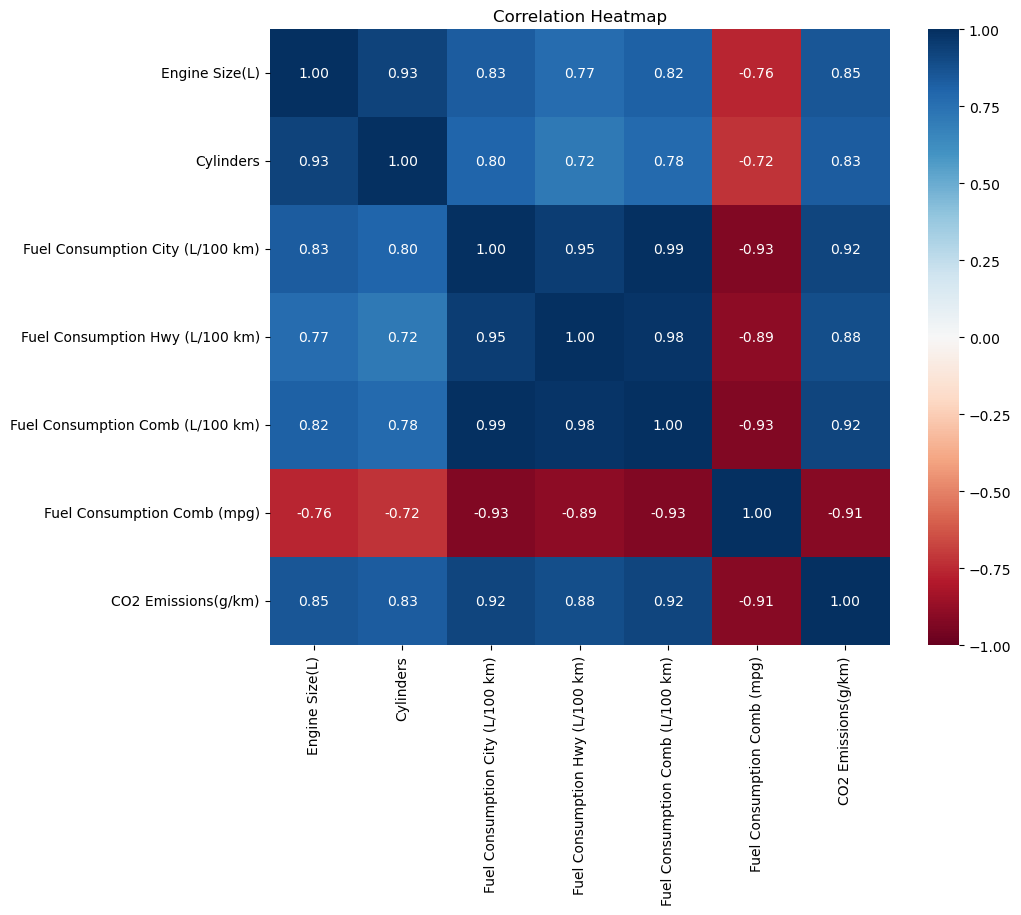

In [114]:

# Calculate the correlation matrix
correlation_matrix = df.corr()

# Create a heatmap using seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, cmap='RdBu', annot=True, fmt=".2f", vmin=-1, vmax=1)

# Set title
plt.title('Correlation Heatmap')

# Show the plot
plt.show()


In [115]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Engine Size(L),6282.0,3.161812,1.365201,0.9,2.0,3.0,3.7,8.4
Cylinders,6282.0,5.618911,1.846250,3.0,4.0,6.0,6.0,16.0
Fuel Consumption City (L/100 km),6282.0,12.610220,3.553066,4.2,10.1,12.1,14.7,30.6
Fuel Consumption Hwy (L/100 km),6282.0,9.070583,2.278884,4.0,7.5,8.7,10.3,20.6
Fuel Consumption Comb (L/100 km),6282.0,11.017876,2.946876,4.1,8.9,10.6,12.7,26.1
Fuel Consumption Comb (mpg),6282.0,27.411016,7.245318,11.0,22.0,27.0,32.0,69.0
CO2 Emissions(g/km),6282.0,251.157752,59.290426,96.0,208.0,246.0,289.0,522.0


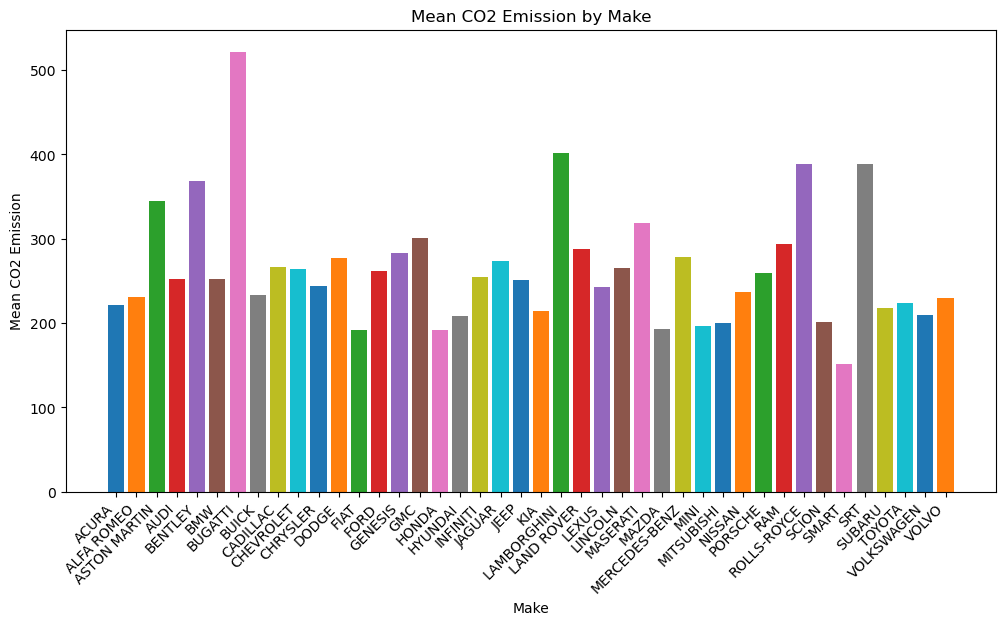

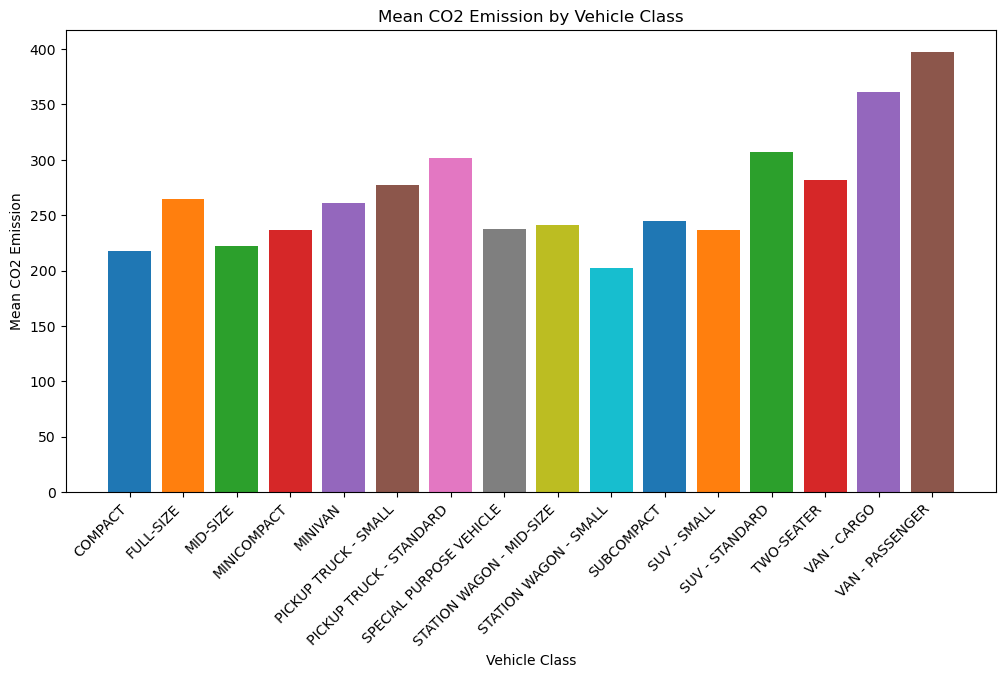

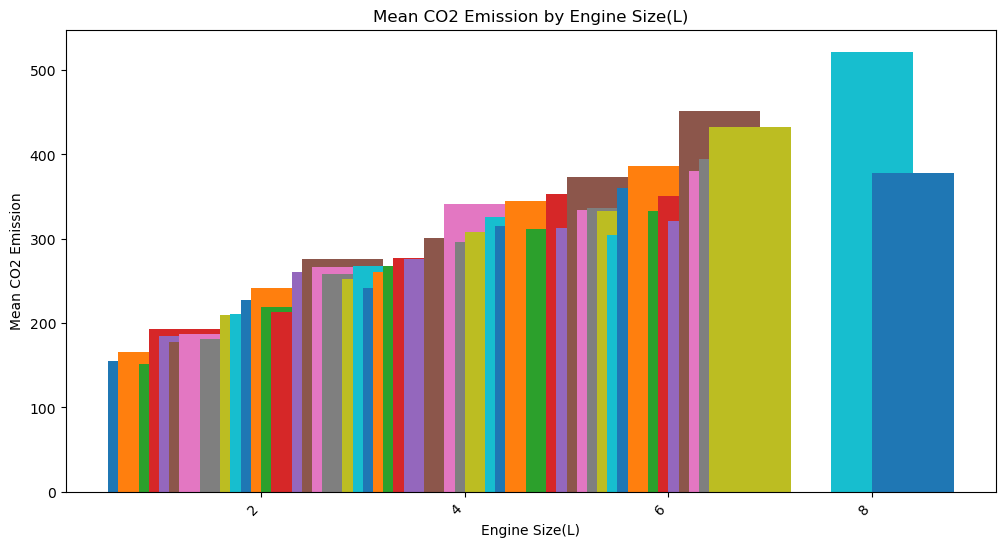

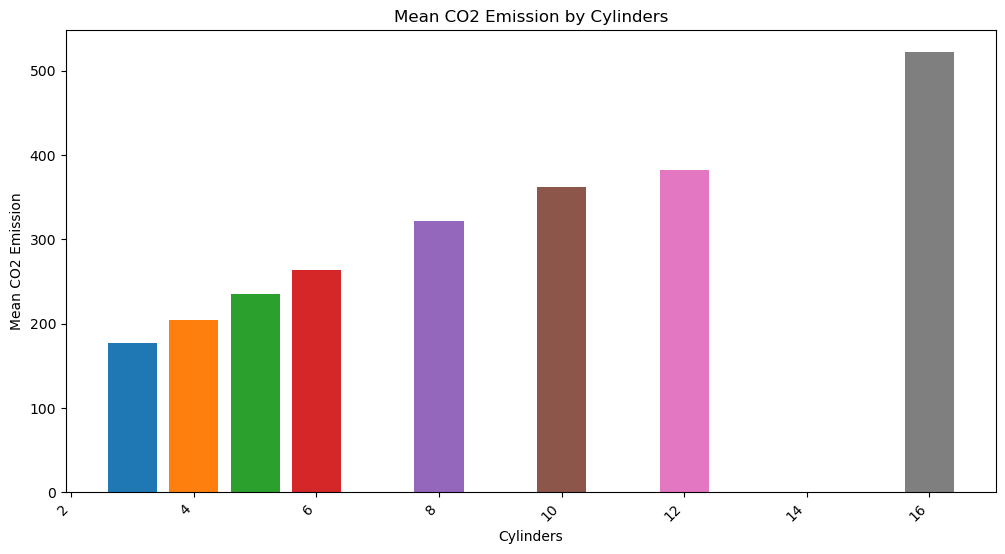

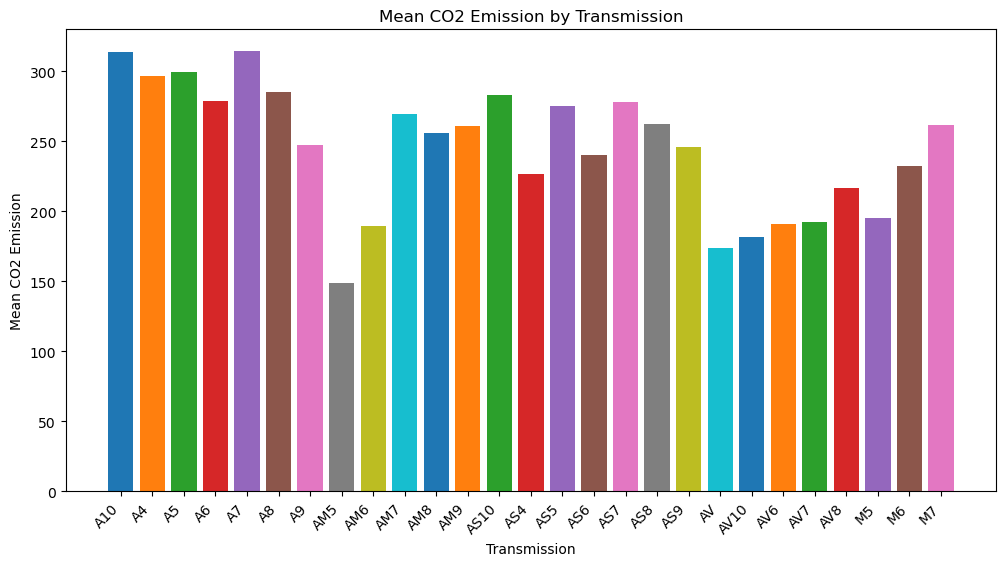

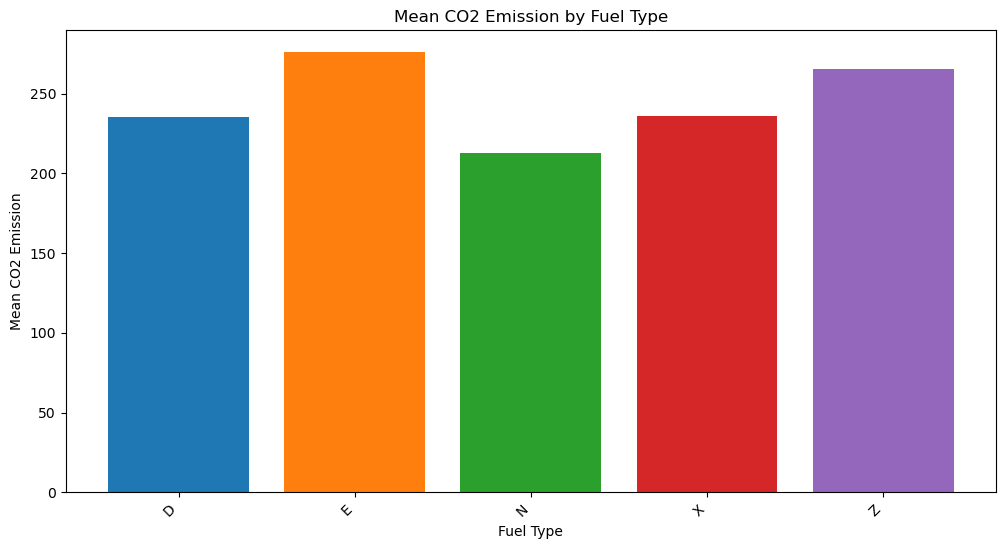

In [116]:
# Define a function to explore categorical features
def explore_cat_feature(df, feature):
    # Group by the specified feature and calculate the mean CO2 emissions
    group = df.groupby(feature)['CO2 Emissions(g/km)'].mean().reset_index()

    # Create a color cycle for different bars
    color_cycle = cycle(plt.rcParams['axes.prop_cycle'].by_key()['color'])

    # Create a bar plot with different colors for each bar
    fig, ax = plt.subplots(figsize=(12, 6))
    bars = ax.bar(group[feature], group['CO2 Emissions(g/km)'], color=[next(color_cycle) for _ in range(len(group))])

    # Set title and labels
    ax.set_title(f"Mean CO2 Emission by {feature}")
    ax.set_xlabel(feature)
    ax.set_ylabel('Mean CO2 Emission')

    # Rotate x-axis labels for better readability
    plt.xticks(rotation=45, ha='right')

    # Show the plot
    plt.show()

# List of categorical features to explore
cat_features = ['Make', 'Vehicle Class', 'Engine Size(L)', 'Cylinders', 'Transmission', 'Fuel Type']

# Call the function for each categorical feature
for feature in cat_features:
    explore_cat_feature(df, feature)


In [117]:
data = pd.read_csv('CO2 Emissions_Canada.csv')

# Define features (X) and labels (y)
X = data.drop('CO2 Emissions(g/km)', axis=1)
y = data['CO2 Emissions(g/km)']


In [118]:
print(data.columns)

Index(['Make', 'Model', 'Vehicle Class', 'Engine Size(L)', 'Cylinders',
       'Transmission', 'Fuel Type', 'Fuel Consumption City (L/100 km)',
       'Fuel Consumption Hwy (L/100 km)', 'Fuel Consumption Comb (L/100 km)',
       'Fuel Consumption Comb (mpg)', 'CO2 Emissions(g/km)'],
      dtype='object')


# Preprocessing the data

In [119]:
#check for missing values
missing_values = data.isnull().sum()
print("Missing Values:")
print(missing_values)

Missing Values:
Make                                0
Model                               0
Vehicle Class                       0
Engine Size(L)                      0
Cylinders                           0
Transmission                        0
Fuel Type                           0
Fuel Consumption City (L/100 km)    0
Fuel Consumption Hwy (L/100 km)     0
Fuel Consumption Comb (L/100 km)    0
Fuel Consumption Comb (mpg)         0
CO2 Emissions(g/km)                 0
dtype: int64


In [120]:
label_encoder = LabelEncoder()
data['Vehicle Class'] = label_encoder.fit_transform(data['Vehicle Class'])
X = data[['Engine Size(L)', 'Cylinders', 'Fuel Consumption City (L/100 km)', 'Vehicle Class']]
y = data['CO2 Emissions(g/km)']

## Splitting data in to training and testing sets

In [122]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [123]:
scaler = StandardScaler()
scaler.fit(X_train)

StandardScaler()

In [124]:
X_train_scaled = scaler.transform(X_train)
X_train_scaled

array([[-0.12149345,  0.20534188, -0.33509065,  0.74654711],
       [ 0.6141664 ,  0.20534188,  0.6072775 , -0.2912412 ],
       [-0.12149345,  0.20534188,  0.350268  , -1.32902952],
       ...,
       [ 0.24633648,  0.20534188, -0.24942082,  1.16166244],
       [-0.48932338, -0.88513888, -0.87766626,  0.95410478],
       [ 0.6141664 ,  1.29582264,  0.23604156, -1.12147185]])

In [125]:
X_test_scaled = scaler.transform(X_test)
X_test_scaled

array([[-0.12149345,  0.20534188, -0.04952455, -1.12147185],
       [ 0.90843035,  1.29582264,  1.34974937,  0.74654711],
       [ 2.23261809,  1.29582264,  1.00707004, -0.08368354],
       ...,
       [-1.29854922, -0.88513888, -1.07756253,  0.53898945],
       [ 0.24633648,  0.20534188, -0.1923076 , -0.91391419],
       [-0.85715331, -0.88513888, -0.84910965, -1.32902952]])

In [126]:
model = LinearRegression()


In [127]:
#Model training
model.fit(X_train, y_train)


LinearRegression()

In [128]:
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 404.1233302241802
R-squared: 0.8825095623681144


In [129]:
# Calculate Mean Squared Error (MSE) for training and testing data
train_mse = mean_squared_error(y_train, model.predict(X_train))
test_mse = mean_squared_error(y_test, y_pred)

# Calculate R-squared (R2) for training and testing data
train_r2 = r2_score(y_train, model.predict(X_train))
test_r2 = r2_score(y_test, y_pred)

# Print the results
print(f"Training Mean Squared Error: {train_mse}")
print(f"Testing Mean Squared Error: {test_mse}")
print(f"Training R-squared: {train_r2}")
print(f"Testing R-squared: {test_r2}")


Training Mean Squared Error: 403.6908678399931
Testing Mean Squared Error: 404.1233302241802
Training R-squared: 0.8819117031025883
Testing R-squared: 0.8825095623681144


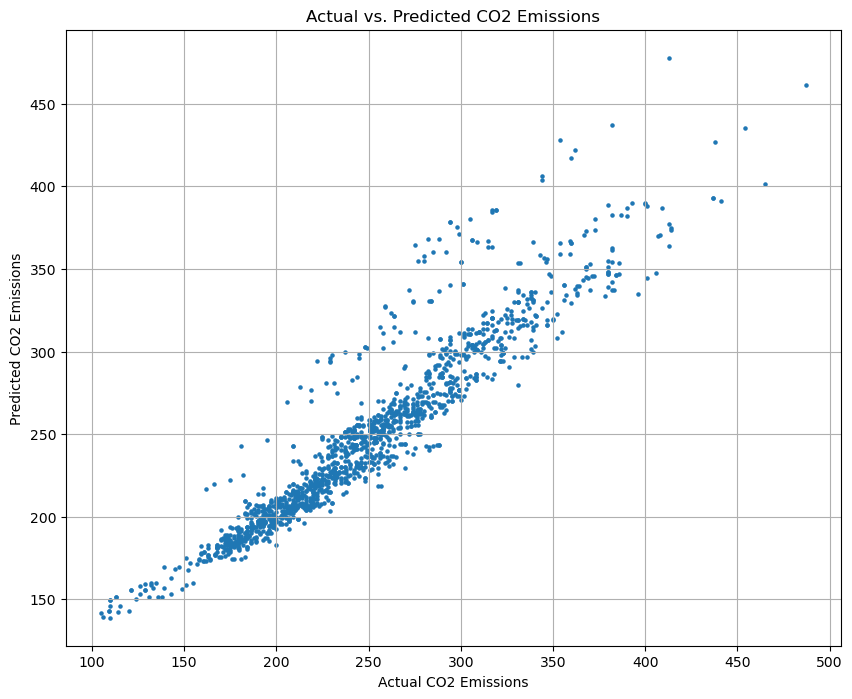

In [130]:
scatter_df = pd.DataFrame({'Actual CO2 Emissions': y_test, 'Predicted CO2 Emissions': y_pred})

# Create a scatter plot 
plt.figure(figsize=(10, 8))
plt.scatter(scatter_df['Actual CO2 Emissions'], scatter_df['Predicted CO2 Emissions'], s=5)  # s is marker size
plt.title('Actual vs. Predicted CO2 Emissions')
plt.xlabel('Actual CO2 Emissions')
plt.ylabel('Predicted CO2 Emissions')
plt.grid(True)
plt.show()


## Random Forest Regressor 

In [131]:
# Initialize the Random Forest Regressor
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)  # Train the model

# Predict on the training and testing data
train_preds = rf.predict(X_train)
test_preds = rf.predict(X_test)

# Calculate Mean Squared Error
train_mse = mean_squared_error(y_train, train_preds)
test_mse = mean_squared_error(y_test, test_preds)

# Calculate R-squared (accuracy) for training and testing data
train_r2 = r2_score(y_train, train_preds)
test_r2 = r2_score(y_test, test_preds)

# Calculate Root Mean Squared Error (RMSE)
train_rmse = math.sqrt(train_mse)
test_rmse = math.sqrt(test_mse)

# Print the results
print('Training Accuracy (R-squared):', train_r2)
print('Testing Accuracy (R-squared):', test_r2)
print('Training Root Mean Squared Error (RMSE):', train_rmse)
print('Testing Root Mean Squared Error (RMSE):', test_rmse)

Training Accuracy (R-squared): 0.9955476124897598
Testing Accuracy (R-squared): 0.9801556431731288
Training Root Mean Squared Error (RMSE): 3.901373330731952
Testing Root Mean Squared Error (RMSE): 8.261791195950954


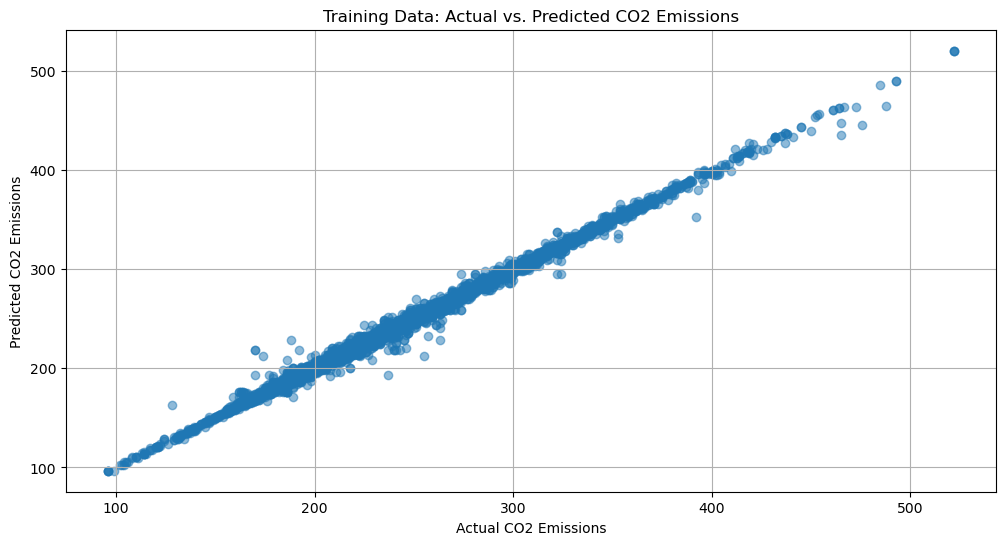

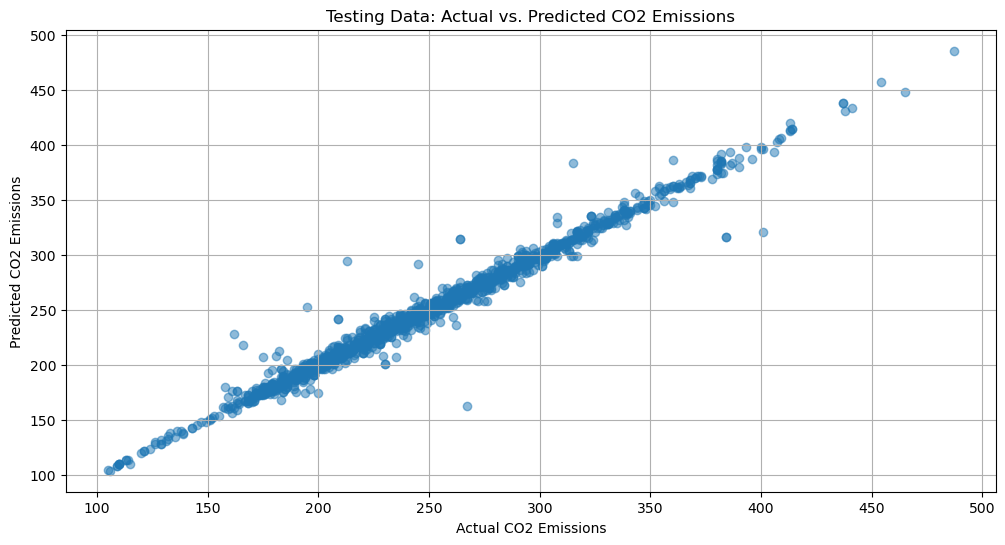

In [132]:
# Scatter plot for training data
plt.figure(figsize=(12, 6))
plt.scatter(y_train, train_preds, alpha=0.5)
plt.title("Training Data: Actual vs. Predicted CO2 Emissions")
plt.xlabel("Actual CO2 Emissions")
plt.ylabel("Predicted CO2 Emissions")
plt.grid(True)
plt.show()

# Scatter plot for testing data
plt.figure(figsize=(12, 6))
plt.scatter(y_test, test_preds, alpha=0.5)
plt.title("Testing Data: Actual vs. Predicted CO2 Emissions")
plt.xlabel("Actual CO2 Emissions")
plt.ylabel("Predicted CO2 Emissions")
plt.grid(True)
plt.show()


## XGBoost Regressor

In [133]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [134]:
# Create an XGBoost regressor
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)

# Train the model on the training data
xgb_model.fit(X_train, y_train)

# Make predictions on the training and testing data
train_preds = xgb_model.predict(X_train)
test_preds = xgb_model.predict(X_test)

# Calculate Mean Squared Error
train_mse = mean_squared_error(y_train, train_preds)
test_mse = mean_squared_error(y_test, test_preds)

# Calculate R-squared (accuracy) for training and testing data
train_r2 = r2_score(y_train, train_preds)
test_r2 = r2_score(y_test, test_preds)

# Print the results
print('Training Accuracy (R-squared):', train_r2)
print('Testing Accuracy (R-squared):', test_r2)
print('Training Root Mean Squared Error (RMSE):', train_rmse)
print('Testing Root Mean Squared Error (RMSE):', test_rmse)

Training Accuracy (R-squared): 0.9946606988497929
Testing Accuracy (R-squared): 0.9823237470317739
Training Root Mean Squared Error (RMSE): 3.901373330731952
Testing Root Mean Squared Error (RMSE): 8.261791195950954


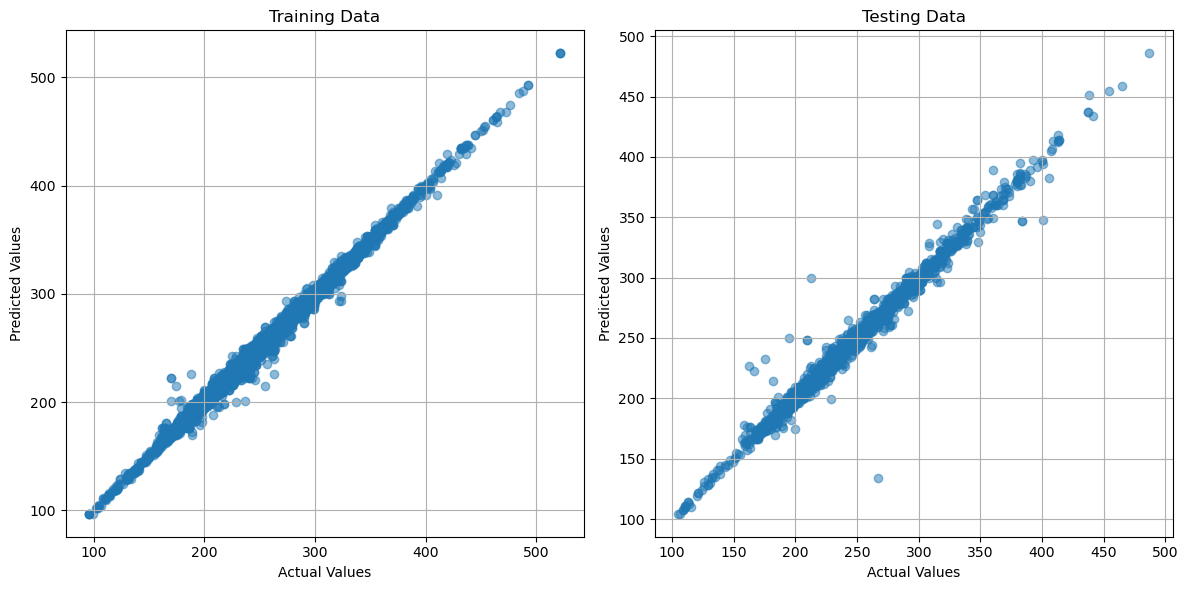

In [135]:
# Create DataFrames for training and testing data
train_df = pd.DataFrame({'Actual Values': y_train, 'Predicted Values': train_preds})
test_df = pd.DataFrame({'Actual Values': y_test, 'Predicted Values': test_preds})

# Create a subplot with two scatter plots
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Scatter plot for training data
axes[0].scatter(train_df['Actual Values'], train_df['Predicted Values'], alpha=0.5)
axes[0].set_title("Training Data")
axes[0].set_xlabel("Actual Values")
axes[0].set_ylabel("Predicted Values")
axes[0].grid(True)

# Scatter plot for testing data
axes[1].scatter(test_df['Actual Values'], test_df['Predicted Values'], alpha=0.5)
axes[1].set_title("Testing Data")
axes[1].set_xlabel("Actual Values")
axes[1].set_ylabel("Predicted Values")
axes[1].grid(True)

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


# SVM

Mean Squared Error: 578.4627664282878
R-squared: 0.8318240039650543


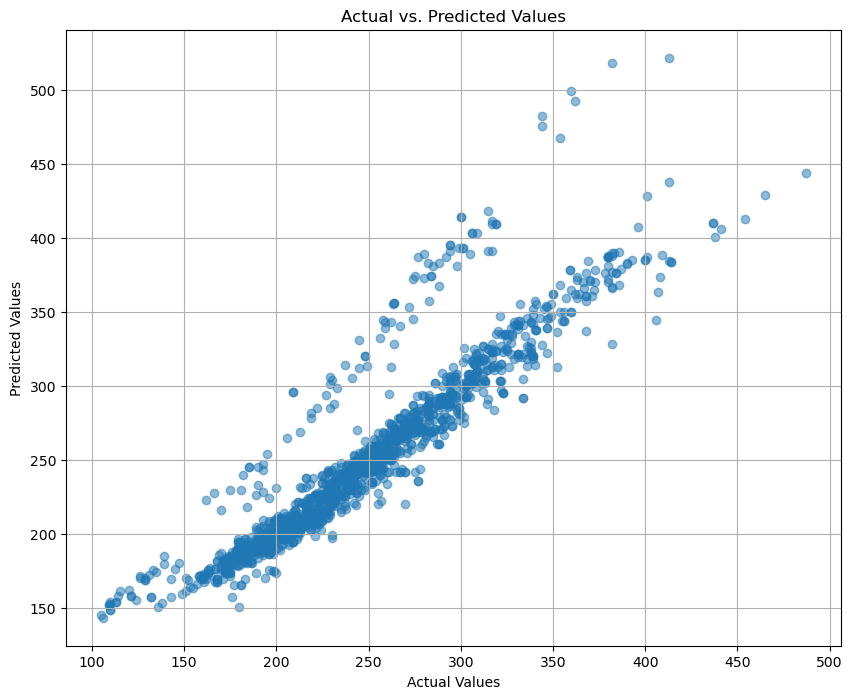

In [136]:
# Load your dataset
data = pd.read_csv('CO2 Emissions_Canada.csv')

# Define features (X) and the target variable (y)
X = data[['Engine Size(L)', 'Cylinders', 'Fuel Consumption Hwy (L/100 km)']]
y = data['CO2 Emissions(g/km)']
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create an SVR (Support Vector Regression) model
svr_model = SVR(kernel='linear')  # You can choose different kernels like 'linear', 'rbf', 'poly', etc.

# Train the model
svr_model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = svr_model.predict(X_test)

# Calculate Mean Squared Error
mse = mean_squared_error(y_test, y_pred)

# Calculate R-squared (accuracy)
r2 = r2_score(y_test, y_pred)

# Print the results
print("Mean Squared Error:", mse)
print("R-squared:", r2)

import matplotlib.pyplot as plt

# Visualize the results (scatter plot)
plt.figure(figsize=(10, 8))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.title('Actual vs. Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.grid(True)
plt.show()




# Predicted Values

In [137]:
# New feature values for prediction
new_data = pd.DataFrame({
    'Engine Size(L)': [2.0], 
    'Cylinders': [4],
    'Fuel Consumption Hwy (L/100 km)': [7.0]})

# Use the SVR model to predict CO2 Emissions for the new data
predicted_emissions = svr_model.predict(new_data)

# Display the predicted CO2 Emissions
print("Predicted CO2 Emissions:")
print(predicted_emissions)

Predicted CO2 Emissions:
[196.37833854]
